### 빅데이터 분석 결과 시각화
- 230502 평가

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 1. mpg 데이터셋

In [3]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# 1)
df = mpg.pivot_table('mpg', 'cylinders', aggfunc='mean')
df

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


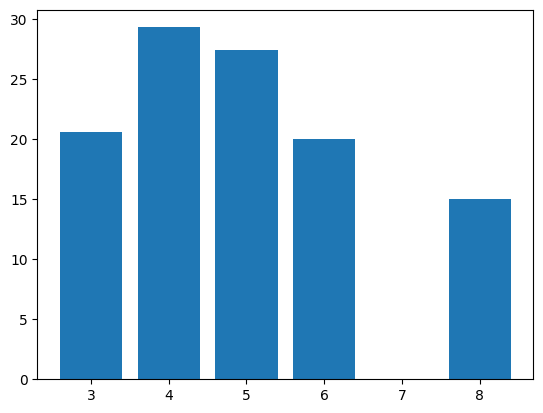

In [6]:
plt.bar(df.index, df.mpg)
plt.show()

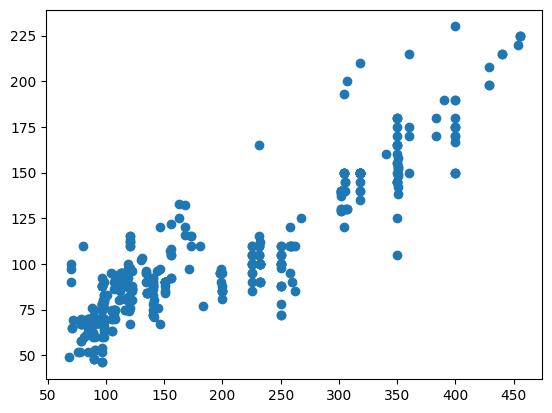

In [7]:
# 2)
plt.scatter(mpg.displacement, mpg.horsepower);

In [9]:
# 3)
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth


In [10]:
# 4)
df = mpg.pivot_table('mpg', 'manufacturer', aggfunc=['count', 'mean'])
df

,count,mean
,mpg,mpg
manufacturer,,
amc,28,18.246429
audi,7,26.714286
bmw,2,23.750000
buick,17,19.182353
cadillac,2,19.750000
capri,1,25.000000
chevroelt,1,16.000000
chevrolet,43,20.472093


In [11]:
df.columns = ['count', 'mean']
df.head()

,count,mean
manufacturer,,
amc,28,18.246429
audi,7,26.714286
bmw,2,23.750000
buick,17,19.182353
cadillac,2,19.750000


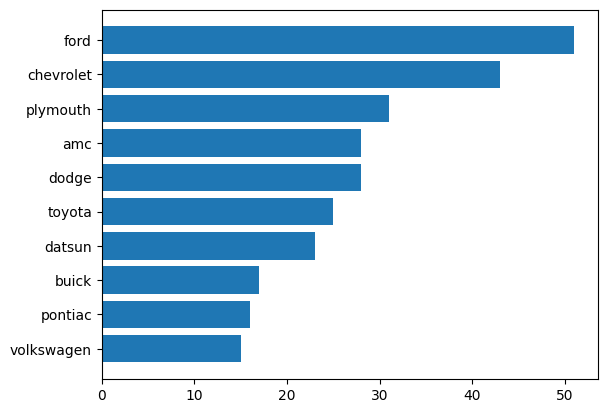

In [29]:
count_df = df.sort_values(by='count', ascending=False).head(10) 
plt.barh(count_df.index[::-1], count_df['count'][::-1]);

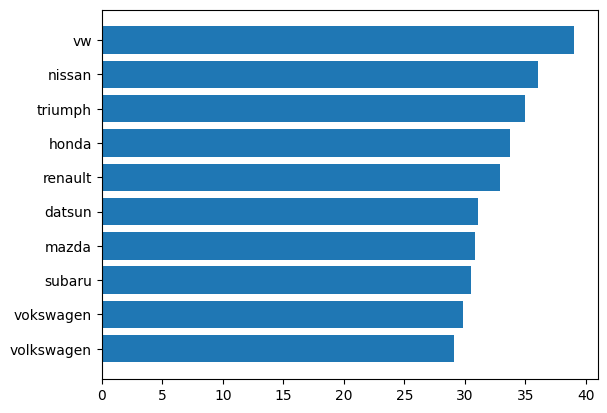

In [30]:
mean_df = df.sort_values(by='mean', ascending=False).head(10)
plt.barh(mean_df.index[::-1], mean_df['mean'][::-1]);

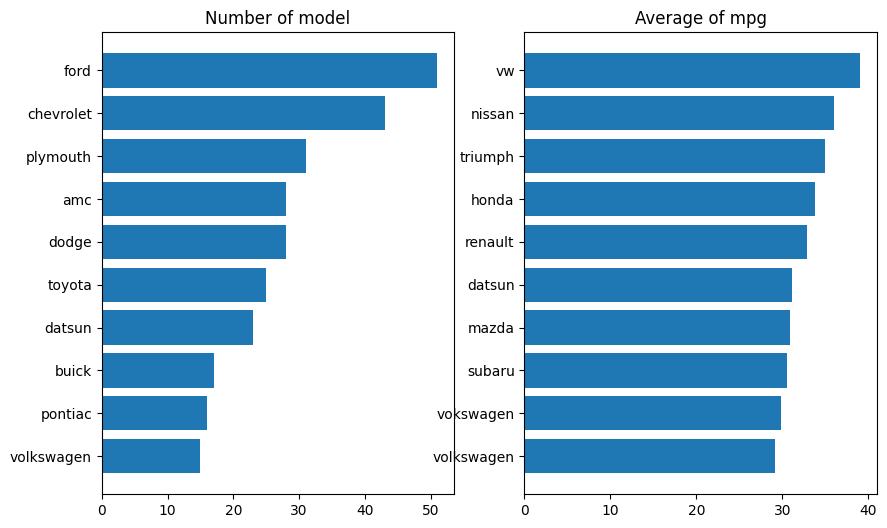

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Number of model')
plt.barh(count_df.index[::-1], count_df['count'][::-1])
plt.subplot(122)
plt.title('Average of mpg')
plt.barh(mean_df.index[::-1], mean_df['mean'][::-1])
plt.show()

##### 2. 경기도청사및출장소현황.csv 파일

In [48]:
# 1)
df = pd.read_csv('../04.지도시각화/data/경기도청사및출장소현황.csv', encoding='euc-kr')
df.head(3)

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
1,2023-03-08,안성시,고삼면,031-678-3980,17505,경기도 안성시 고삼면 고삼호수로 21,경기도 안성시 고삼면 가유리 287-11번지,37.082693,127.263456
2,2023-03-08,안성시,공도읍,031-678-3610,17560,경기도 안성시 공도4로 8,경기도 안성시 공도읍 만정리 793-1번지,37.001014,127.172515


In [49]:
df = df[['시군명', '구분명', '전화번호안내', '소재지도로명주소']]
df = df[df.구분명.str.contains('도청') | df.구분명.str.contains('시청')
        | df.구분명.str.contains('구청')]
df.head()

,시군명,구분명,전화번호안내,소재지도로명주소
0,안성시,안성시청,031-678-2114,경기도 안성시 시청길 25
17,안산시,단원구청,031-481-6000,경기도 안산시 단원구 중앙대로 685 (초지동)
22,안산시,안산시청,031-481-2000,경기도 안산시 단원구 화랑로 387 (고잔동)
42,안산시,상록구청,031-481-5000,경기도 안산시 상록구 석호로 110 (사동)
52,군포시,군포시청,031-392-3000,경기도 군포시 청백리길 6


In [51]:
# 2)
import requests, folium
from urllib.parse import quote

with open('../04.지도시각화/data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [37]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [38]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df.소재지도로명주소[i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [50]:
df['위도'] = lat_list
df['경도'] = lng_list
df.tail()

,시군명,구분명,전화번호안내,소재지도로명주소,위도,경도
761,용인시,수지구청,031-324-8114,경기도 용인시 수지구 포은대로 435 (풍덕천동),37.322255,127.097822
772,용인시,처인구청,031-324-5114,경기도 용인시 처인구 금령로 50 (김량장동),37.234380,127.201337
778,의왕시,의왕시청,031-345-2114,경기도 의왕시 시청로 11 (고천동),37.345513,126.968256
797,평택시,평택시청,031-8024-5000,경기도 평택시 경기대로 245 (비전동),36.992299,127.112525
812,포천시,포천시청,031-538-2114,경기도 포천시 중앙로 87 (신읍동),37.894700,127.200339


In [62]:
# 3)
def get_color(s):
    color = 'green' if s.find('도청') >= 0 else \
                'blue' if s.find('시청') >= 0 else 'red'
    return color
def get_size(s):
    size = 1000 if s == 'green' else 800 if s == 'blue' else 600
    return size

In [63]:
df['color'] = df.구분명.apply(lambda x: get_color(x))
df['size'] = df.color.apply(lambda x: get_size(x))
df.head()

,시군명,구분명,전화번호안내,소재지도로명주소,위도,경도,color,size
0,안성시,안성시청,031-678-2114,경기도 안성시 시청길 25,37.008308,127.279210,blue,800
17,안산시,단원구청,031-481-6000,경기도 안산시 단원구 중앙대로 685 (초지동),37.319777,126.811755,red,600
22,안산시,안산시청,031-481-2000,경기도 안산시 단원구 화랑로 387 (고잔동),37.322557,126.832714,blue,800
42,안산시,상록구청,031-481-5000,경기도 안산시 상록구 석호로 110 (사동),37.301335,126.846410,red,600
52,군포시,군포시청,031-392-3000,경기도 군포시 청백리길 6,37.361023,126.935316,blue,800


In [64]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=10)
for i in df.index:
    folium.Circle(
        location=[df.위도[i], df.경도[i]],
        popup=folium.Popup(df.전화번호안내[i], max_width=100),
        tooltip=df.구분명[i],
        color=df.color[i], radius=int(df['size'][i]), fill=True
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px">경기도내 주요 관공서</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map